 # **Importing Libraries**

---
---

In [104]:
# Importing OpenCV library for image processing tasks (e.g., reading, resizing images)
import cv2

# Importing 'os' to handle directory and file path manipulations (e.g., listing files in directories)
import os

# Importing TensorFlow, a powerful library for building and training deep learning models
import tensorflow as tf

# Importing Keras, which is built into TensorFlow, for defining and training neural networks
from tensorflow import keras

# Importing 'Image' from PIL (Python Imaging Library) to work with image files
from PIL import Image

# Importing NumPy to handle numerical operations, especially arrays (image data is often represented as arrays)
import numpy as np

# Importing Matplotlib's 'pyplot' module for creating visualizations like pie charts, plots, etc.
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization (used for making attractive plots)
import seaborn as sns

# Importing Keras utility to load a pre-trained model
from tensorflow.keras.models import load_model

# Importing 'train_test_split' from Scikit-learn to split datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Importing 'normalize' from Keras utilities to normalize image data (scaling pixel values)
from keras.utils import normalize

# Importing the Sequential model class from Keras to define neural networks layer by layer
from keras.models import Sequential

# Importing convolutional and pooling layers to create CNN architecture
from keras.layers import Conv2D, MaxPooling2D

# Importing activation functions (e.g., ReLU, Softmax), Dropout (for regularization), and Dense layers for fully connected networks
from keras.layers import Activation, Dropout, Flatten, Dense

# Importing 'to_categorical' from Keras utilities to convert labels into one-hot encoded format (useful for classification tasks)
from keras.utils import to_categorical

# Importing confusion matrix and classification report utilities from Scikit-learn to evaluate model performance
from sklearn.metrics import confusion_matrix


## Connect to the Google Drive

In [105]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Preprocessing**  :

---
---


1.   Read the folders pathes
2.   Visualize dataset images
3.   Put the labeling for the folders
4.   Image data processing

 ## 1- Reading the folder pathes


In [106]:

# Update the image directory path to the new location
image_directory = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain_Tumor_Detection/'

# Load the 'no' and 'yes' tumor images from the respective folders
no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')


In [107]:
# Count the number of images in each category
no_tumor_count = len(no_tumor_images)
yes_tumor_count = len(yes_tumor_images)

# Print the number of images for each category
print(f"Number of Normal MRI images : {no_tumor_count}")
print(f"Number of Tumor MRI images : {yes_tumor_count}")

Number of Normal MRI images : 1500
Number of Tumor MRI images : 1500


 ## 2- Visualize Dataset Images


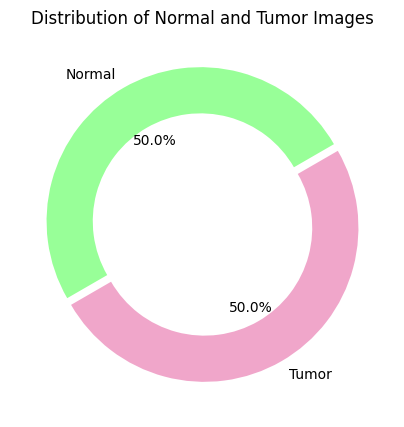

In [108]:
# Define labels and values for the chart
labels = ['Normal', 'Tumor']# Labels for the pie chart segments, 'Normal' and 'Tumor'
values = [no_tumor_count, yes_tumor_count]# The corresponding values for each label (number of images)

# Define colors for the chart segments
colors = ['#98ff98', '#f0a6ca']  # Specify colors for the chart, light green ('#98ff98') for 'Normal' and powder pink ('#f0a6ca') for 'Tumor'

# Create a donut chart
plt.figure(figsize=(5, 5))  # Set the size of the figure (5 inches width and height)

# Create the pie chart
plt.pie(values,
        labels=labels,  # Add the labels ('Normal' and 'Tumor') to the pie chart
        colors=colors,  # Use the defined colors for each segment (light green for normal, powder pink for tumor)
        autopct='%.1f%%',  # Display the percentage of each category, formatted to 1 decimal place (e.g., 50.0%)
        explode=(0.025, 0.025),  # Slightly separate the slices from the center (pull both segments out by 0.025)
        startangle=30,  # Rotate the chart by 30 degrees to improve visualization
        wedgeprops=dict(width=0.3))  # Adjust the width to create a donut-like appearance (0.3 width creates a hollow center)

# Add a title to the plot
plt.title('Distribution of Normal and Tumor Images')  # Title for the chart

# Display the plot
plt.show()  # Render the chart

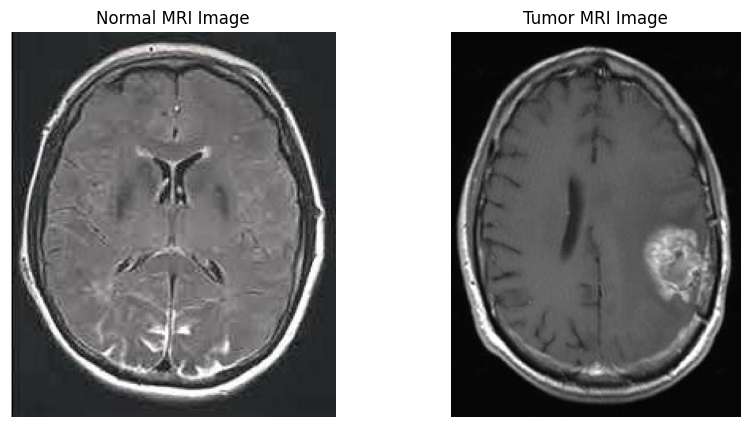

In [109]:
# Select one image from each category (Normal and Tumor)
normal_image_path = os.path.join(image_directory + 'no/', no_tumor_images[0])  # First image in the 'no' folder
tumor_image_path = os.path.join(image_directory + 'yes/', yes_tumor_images[0])  # First image in the 'yes' folder

# Load the images using OpenCV
normal_image = cv2.imread(normal_image_path)  # Read the normal image
tumor_image = cv2.imread(tumor_image_path)  # Read the tumor image

# Plot the images side by side
plt.figure(figsize=(10, 5))  # Set figure size

# Display Normal MRI Image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(normal_image)  # Display normal MRI image
plt.title("Normal MRI Image")  # Title for the image
plt.axis('off')  # Turn off axis labels

# Display Tumor MRI Image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(tumor_image)  # Display tumor MRI image
plt.title("Tumor MRI Image")  # Title for the image
plt.axis('off')  # Turn off axis labels

# Show the images
plt.show()

 ## 3- Loading , Preprocessing and Label Normal MRI Images [0]


In [110]:
# Initialize dataset and label lists
dataset = []  # List to store the images (as numpy arrays)
label = []    # List to store the corresponding labels (0 for no tumor)

# all images will be resized (64x64 pixels), the choice of 64 as the input size is a balance between maintaining enough detail for effective learning while minimizing memory usage and computation time.
INPUT_SIZE = 64

# Loop through all images in the 'no' folder
for i, image_name in enumerate(no_tumor_images):  # Iterate through the list of image

    # Check if the image extension is 'jpg' to ensure you're processing JPEG images only
    if image_name.split('.')[1] == 'jpg':  # Split the image name and get the file extension

        # Read the image using OpenCV's imread function. This loads the image as a numpy array.
        image = cv2.imread(image_directory + 'no/' + image_name)  # Load the image from the specified path

        # Convert the image to a PIL Image object, specifying that it is an RGB image
        #If your original MRI images are grayscale (1 channel), using 'RGB' in this context will create a 3-channel image where each of the R, G, and B channels
        #will have the same pixel values as the original grayscale image.
        image = Image.fromarray(image, 'RGB')  # Create a PIL [Python Imaging Library] Image from the numpy array

        # Resize the image to the specified input size (64x64 pixels)
        image = image.resize((INPUT_SIZE, INPUT_SIZE))  # Resize the image for consistent input size

        # Append the resized image (as a numpy array) to the 'dataset' list
        dataset.append(np.array(image))  # Convert the PIL Image back to a numpy array and add it to the dataset looks like this (Box: [Photo1 (array), Photo2 (array), Photo3 (array)])

        # Append the label '0' (no tumor) to the 'label' list for this image
        label.append(0)  # Add the label for this image indicating it has no tumor


 ## 3- Loading , Preprocessing and Label Tumor MRI Images [1]

In [111]:
# Loop through all images in the 'yes' folder (images with tumors)
for i, image_name in enumerate(yes_tumor_images):

    # Again, check if the file is a JPEG image by verifying the extension
    if image_name.split('.')[1] == 'jpg':

        # Read the image from the 'yes' folder using OpenCV
        image = cv2.imread(image_directory + 'yes/' + image_name)

        # Convert the OpenCV image (numpy array) to a PIL Image object, specifying it's an RGB image
        image = Image.fromarray(image, 'RGB')

        # Resize the image to 64x64 pixels (the predefined INPUT_SIZE)
        image = image.resize((INPUT_SIZE, INPUT_SIZE))

        # Append the resized image (as a numpy array) to the 'dataset' list
        dataset.append(np.array(image))

        # Append the label '1' (indicating tumor) to the 'label' list for this image
        label.append(1)



###Convert Lists to Numpy Arrays

In [112]:
# Convert lists to NumPy arrays
dataset = np.array(dataset)
label = np.array(label)

# Check the shapes
print(f"Dataset shape: {dataset.shape}")
print(f"Label shape: {label.shape}")


Dataset shape: (3000, 64, 64, 3)
Label shape: (3000,)


# **Preapre Dataset for Training**

---
---
1. Split the dataset and labels into training and test sets
2. Normalization and Dividing by 255 in Image Processing
3. One-Hot Encoding for Target Variable (y)
4. Visualize X Train , Test and Y Train & Test

## 1. Split the dataset and labels into training and test sets

In [113]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    dataset,       # The array of images (features)
    label,         # The array of labels (targets)
    test_size=0.2, # 20% of the data will be used for testing
    random_state=42 #  ensures that the results are consistent every time the code is run.
)
# X (Features): Represents the input data (images) that the model learns from.
# y (Target Variable): Represents the output data (labels) that the model tries to predict based on the input data.


In [114]:
print(x_train.shape)  # Prints the shape of the training image data
print(y_train.shape)  # Prints the shape of the training labels

print(x_test.shape)   # Prints the shape of the test image data
print(y_test.shape)   # Prints the shape of the test labels



(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


## 2. Normalization and Dividing by 255 in Image Processing
*  When working with images, especially in machine learning models like CNNs for MRI brain tumor detection, normalization is crucial for scaling pixel values.

*   Dividing by 255 scales pixel values from a range of 0 to 255 (where 0 represents black and 255 represents white) to a range of 0 to 1. This helps the model process the data more efficiently, improving convergence and preventing issues with large gradient values during training.

###**Gradient Descent:**
*   The most common gradient-based optimization method. It iteratively updates the model parameters by moving them in the direction of the negative gradient to minimize the loss function.

### **Gradient-based optimization in neural networks:**

*  **Forward pass:**

 Inputs are fed through the network to generate predictions.

*  **Loss calculation:**

 The loss function compares the predicted output to the true output.

###**Importance of Normalization:**

*  Improves training: Models perform better when input data is normalized because it helps stabilize and speed up the optimization process.
Helps avoid vanishing/exploding gradients: Scaling inputs between 0 and 1 keeps values small, which aids gradient-based optimization techniques, especially in deep networks.

In [115]:
# This method scales the pixel values of images (which are typically between 0 and 255)
# to a range between 0 and 1 by dividing each pixel value by 255.0. It is a common practice
# in image processing for neural networks, as it helps the model converge faster.
x_train = x_train.astype('float32') / 255.0  # Normalize training data
x_test = x_test.astype('float32') / 255.0    # Normalize testing data



## 3. One-Hot Encoding for Target Variable (y):
* **Categorical Representation:**

 Converts categorical labels into binary vectors (e.g., "No Tumor" = [1, 0], "Tumor" = [0, 1]).

### **No One-Hot Encoding for Input Data (X):**

*  **Continuous Features:**

 Input data, especially images, consist of continuous numeric values (e.g., pixel intensities) that do not require one-hot encoding.
Image Data: Pixel values are already in a suitable numeric format, making one-hot encoding unnecessary.

In [116]:
# Convert the labels into categorical (one-hot encoded) format
# - `to_categorical`: Converts the integer labels (0 and 1) into a binary class matrix (one-hot encoding)
#   For example, label `0` becomes [1, 0] and label `1` becomes [0, 1]
# - `num_classes=2`: This indicates that we have two classes (0: no tumor, 1: tumor)
# One-hot encoding is necessary because most neural networks require this format for multi-class classification problems.
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# After this, the shape should be (2400, 2) for y_train and (600, 2) for y_test
print(" y_train shape:", y_train.shape)  # Expected: (2400, 2)
print(" y_test shape:", y_test.shape)    # Expected: (600, 2)

# The shape of y_train and y_test after to_categorical() will be:
# (number of training samples, 2) and (number of test samples, 2) respectively.
# This means each label is now represented as a 2-element array where only one element is 'hot' (1) representing the class.

 y_train shape: (2400, 2)
 y_test shape: (600, 2)


## 4. Visualize X Train , Test and Y Train & Test

In [117]:
# Verify the shapes of your datasets before training
print("x_train shape:", x_train.shape)  # Expected: (2400, 64, 64, 3)
print("y_train shape:", y_train.shape)  # Expected: (2400, 2)
print("x_test shape:", x_test.shape)    # Expected: (600, 64, 64, 3)
print("y_test shape:", y_test.shape)    # Expected: (600, 2)


# x_train shape: (2400, 64, 64, 3)
# 2400: Number of training images
# 64: Height of each image in pixels
# 64: Width of each image in pixels
# 3: Number of color channels (RGB)

# y_train shape: (2400, 2)
# 2400: Number of training labels (one for each image)
# 2: Number of classes (e.g., [0, 1] for "Normal" and "Tumor")


x_train shape: (2400, 64, 64, 3)
y_train shape: (2400, 2)
x_test shape: (600, 64, 64, 3)
y_test shape: (600, 2)


Number of samples in x_train: 2400
Number of samples in x_test: 600
Number of samples in y_train: 2400
Number of samples in y_test: 600


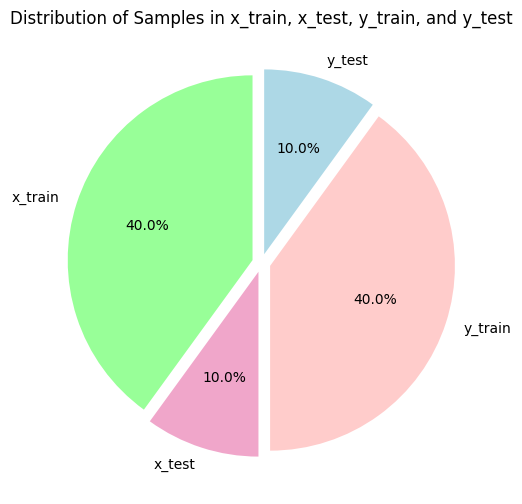

In [118]:
# Get the number of samples in each dataset
num_x_train = x_train.shape[0]  # Number of samples in x_train
num_x_test = x_test.shape[0]    # Number of samples in x_test
num_y_train = y_train.shape[0]  # Number of samples in y_train
num_y_test = y_test.shape[0]    # Number of samples in y_test

# Print the number of samples in each dataset
print(f"Number of samples in x_train: {num_x_train}")
print(f"Number of samples in x_test: {num_x_test}")
print(f"Number of samples in y_train: {num_y_train}")
print(f"Number of samples in y_test: {num_y_test}")

# Define labels and values for the pie chart
labels = ['x_train', 'x_test', 'y_train', 'y_test']
values = [num_x_train, num_x_test, num_y_train, num_y_test]

# Define colors for the pie chart segments
colors = ['#98ff98', '#f0a6ca', '#ffcccb', '#add8e6']  # Green, pink, light red, light blue

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values,
        labels=labels,  # Label each segment
        colors=colors,  # Define colors for each segment
        autopct='%.1f%%',  # Show percentages with one decimal place
        startangle=90,  # Start the first slice at 90 degrees
        explode=(0.05, 0.05, 0.05, 0.05))  # Slightly pull each segment apart for emphasis

# Add a title
plt.title('Distribution of Samples in x_train, x_test, y_train, and y_test')

# Display the chart
plt.show()

# **CNN Model**
---
---

1. Build CNN Model
2. Compile the Model
3. Train & Save the Model
4. Evaluate the model on training and test data
5. Confusion Matrix



## 1. Build CNN Layers

In [119]:
INPUT_SIZE = 64

# Initialize a Sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(64))
model.add(Activation('relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Compile the Model

In [120]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## 3. Train the Model & Save it

In [121]:

# Now train the model
history = model.fit(x_train, y_train,
                    batch_size=16,
                    verbose=1,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=False)


# Define the path where the model will be saved
model_save_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'

# Save the model to the specified path
model.save(model_save_path)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.6673 - loss: 0.6139 - val_accuracy: 0.8267 - val_loss: 0.4158
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8054 - loss: 0.4458 - val_accuracy: 0.8617 - val_loss: 0.3160
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.8537 - loss: 0.3332 - val_accuracy: 0.9133 - val_loss: 0.2417
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9035 - loss: 0.2449 - val_accuracy: 0.9233 - val_loss: 0.1945
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9298 - loss: 0.1645 - val_accuracy: 0.8817 - val_loss: 0.2627
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9675 - loss: 0.1110 - val_accuracy: 0.9450 - val_loss: 0.1655
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.9753 - loss: 0.0816 - val_accuracy: 0.9733 - val_loss: 0.0911
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9841 - loss: 0.0660 -

## 4. Evaluate the model on training and test data

Training Accuracy: 1.00
Test Accuracy: 0.98
Validation Accuracy: 0.98
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


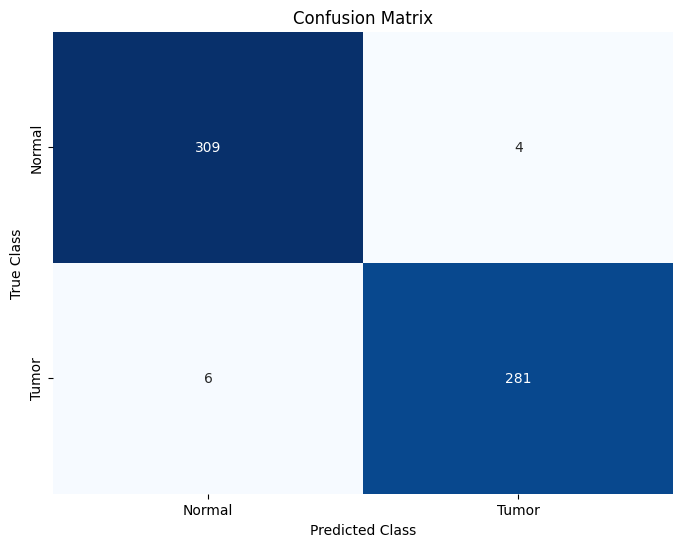

In [122]:
# Evaluate the model on training and test data
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)  # Evaluate on training data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)      # Evaluate on test data

# Print the training and test accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Calculate validation accuracy from the training history
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.2f}')


# Compute confusion matrix for the CNN model
y_pred = model.predict(x_test)  # Predict on test data
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


## 5. Confusion Matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Confusion Matrix:
[[ 96   1]
 [  1 154]]


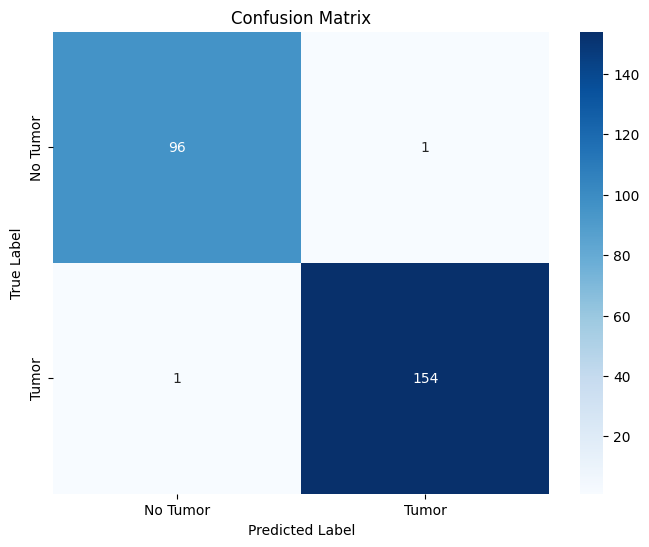

In [123]:
# Load the saved model
model_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'
model = load_model(model_path)

# Set the path to the test dataset
test_dataset_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Test DataSet (yes&no)'

# Initialize lists to hold the images and labels for testing
test_images = []
test_labels = []

# Load test images and labels
for label_name in ['no', 'yes']:
    folder_path = os.path.join(test_dataset_path, label_name)
    label = 0 if label_name == 'no' else 1  # Label for 'no' is 0 and 'yes' is 1

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)  # Read the image
        img = cv2.resize(img, (64, 64))  # Resize the image to the defined size
        test_images.append(img)  # Append the image to the list
        test_labels.append(label)  # Append the corresponding label

# Convert lists to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize the test data
X_test = X_test.astype('float32') / 255.0  # Normalize testing data

# Convert labels to categorical format
y_test_categorical = to_categorical(y_test, num_classes=2)  # One-hot encode testing labels

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)  # Evaluate on test data

# Predict on test data
y_pred = model.predict(X_test)  # Predict on test data
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optionally, print the classification report


## Training and Validation Loss Plot

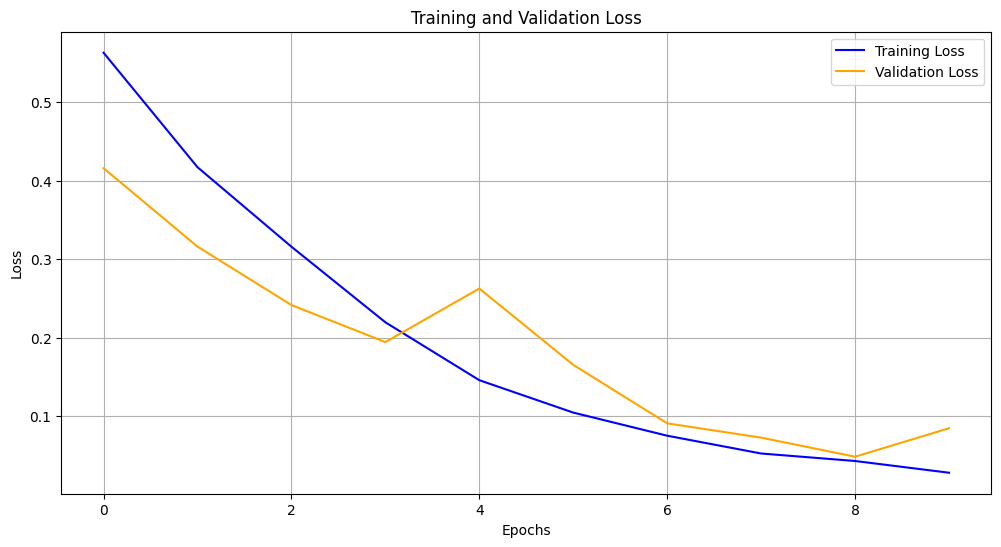

In [124]:
# Load the saved model
model_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'
model = load_model(model_path)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Training and Validation Accuracy Plot.

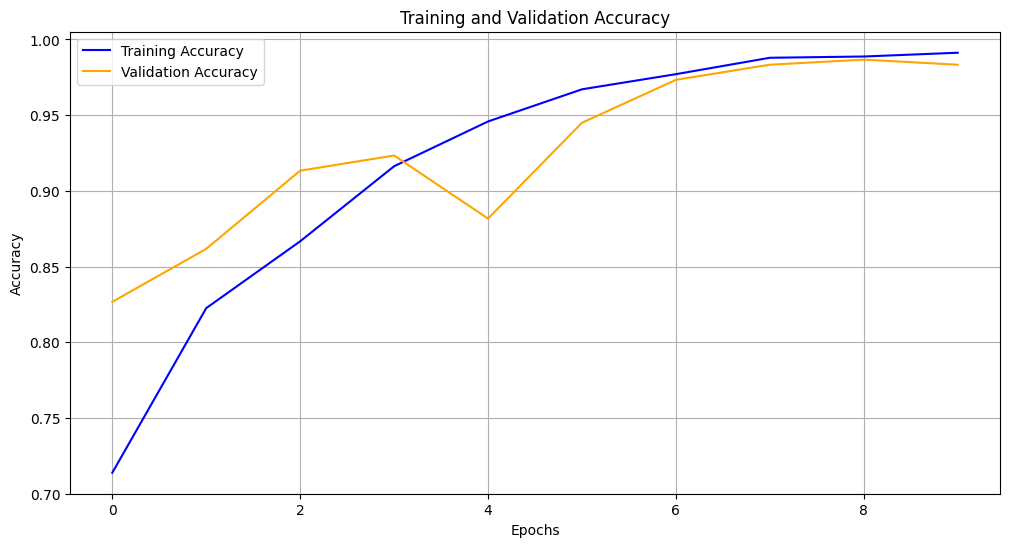

In [125]:
# Load the saved model
model_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'
model = load_model(model_path)

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [126]:

# Define the path to the saved model
model_save_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'

# Load the saved model
model = load_model(model_save_path)

# Define paths
unseen_images_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 1'
predictions_folder = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 1 Pred'


# Create the predictions folder if it doesn't exist
os.makedirs(predictions_folder, exist_ok=True)

# Define the input size for the model (ensure this matches the model's expected input)
INPUT_SIZE = 64  # Adjust this if your model expects a different size

# Define a function to preprocess images
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to the input shape of the model
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))  # Adjust INPUT_SIZE as needed
    # Normalize the image
    img = img / 255.0
    # Expand dimensions to match model input
    img = np.expand_dims(img, axis=0)
    return img

# Get a list of image files in the unseen images directory
image_filenames = [f for f in os.listdir(unseen_images_path) if f.endswith('.jpg') or f.endswith('.png')]

# Define the number of images to display in a single row
images_per_row = 6  # six images per row

# Create a figure for displaying predictions
plt.figure(figsize=(16, len(image_filenames) // images_per_row * 4 + 2))  # Adjust figure size as needed

# Iterate through each image in the unseen images directory
for i, filename in enumerate(image_filenames):
    image_path = os.path.join(unseen_images_path, filename)

    # Preprocess the image
    img = preprocess_image(image_path)

    # Make predictions (set verbose to 0 to suppress output)
    predictions = model.predict(img, verbose=0)  # Suppress output
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class

    # Set the predicted label based on the model's output
    predicted_label = 'Tumor' if predicted_class == 1 else 'Normal'  # Adjust according to your model's output

    # Read and process the original image for display
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_image = cv2.resize(original_image, (150, 150))  # Resize for consistent display size

    # Create subplots in a grid layout
    plt.subplot(len(image_filenames) // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(original_image)  # Display the original image

    # Display the predicted label and the actual label ("Tumor")
    actual_label = 'Normal'  # Assuming all images are tumors in this folder
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")  # Show predicted and actual labels
    plt.axis('off')  # Turn off axis for better visualization

    # Save the prediction image with the predicted label in the filename
    output_image_path = os.path.join(predictions_folder, f"{filename.split('.')[0]}_predicted_{predicted_label}.jpg")
    cv2.imwrite(output_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))  # Save as BGR

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Predictions for Unseen Images (Folder 1)', fontsize=23, y=1.02)  # Title for the entire plot
plt.show()

print("Predictions completed and saved in:", predictions_folder)


Output hidden; open in https://colab.research.google.com to view.

In [127]:

# Define the path to the saved model
model_save_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'

# Load the saved model
model = load_model(model_save_path)

# Define paths
unseen_images_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 2'  # Updated to Folder 2
predictions_folder = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 2 Pred'  # Updated predictions path

# Create the predictions folder if it doesn't exist
os.makedirs(predictions_folder, exist_ok=True)

# Define the input size for the model (ensure this matches the model's expected input)
INPUT_SIZE = 64  # Adjust this if your model expects a different size

# Define a function to preprocess images
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to the input shape of the model
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))  # Adjust INPUT_SIZE as needed
    # Normalize the image
    img = img / 255.0
    # Expand dimensions to match model input
    img = np.expand_dims(img, axis=0)
    return img

# Get a list of image files in the unseen images directory
image_filenames = [f for f in os.listdir(unseen_images_path) if f.endswith('.jpg') or f.endswith('.png')]

# Define the number of images to display in a single row
images_per_row = 6  # six images per row

# Create a figure for displaying predictions
plt.figure(figsize=(16, len(image_filenames) // images_per_row * 4 + 2))  # Adjust figure size as needed

# Iterate through each image in the unseen images directory
for i, filename in enumerate(image_filenames):
    image_path = os.path.join(unseen_images_path, filename)

    # Preprocess the image
    img = preprocess_image(image_path)

    # Make predictions (set verbose to 0 to suppress output)
    predictions = model.predict(img, verbose=0)  # Suppress output
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class
    predicted_label = 'Normal' if predicted_class == 0 else 'Tumor'  # Adjust according to your class labels

    # Read and process the original image for display
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_image = cv2.resize(original_image, (150, 150))  # Resize for consistent display size

    # Create subplots in a grid layout
    plt.subplot(len(image_filenames) // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(original_image)  # Display the original image

    # Display the predicted label
    plt.title(f"Pred: {predicted_label}")  # Show predicted label
    plt.axis('off')  # Turn off axis for better visualization

    # Save the prediction image with the predicted label in the filename
    output_image_path = os.path.join(predictions_folder, f"{filename.split('.')[0]}_predicted_{predicted_label}.jpg")
    cv2.imwrite(output_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))  # Save as BGR

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Predictions for Unseen Images (Folder 2)', fontsize=23, y=1.02)  # Title for the entire plot
plt.show()

print("Predictions completed and saved in:", predictions_folder)


Output hidden; open in https://colab.research.google.com to view.

In [128]:

# Define the path to the saved model
model_save_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/BrainTumorEnhancement(6).h5'

# Load the saved model
model = load_model(model_save_path)

# Define paths for the unseen images and predictions
unseen_images_path = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 3 '  # Updated to Folder 3
predictions_folder = '/content/drive/MyDrive/Brain_Tumor_Detection_MRI/Brain Tumor Dataset Yes-No/Folder 3 Pred'  # Updated predictions path

# Create the predictions folder if it doesn't exist
os.makedirs(predictions_folder, exist_ok=True)

# Define the input size for the model (ensure this matches the model's expected input)
INPUT_SIZE = 64  # Adjust this if your model expects a different size

# Define a function to preprocess images
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to the input shape of the model
    img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))  # Adjust INPUT_SIZE as needed
    # Normalize the image
    img = img / 255.0
    # Expand dimensions to match model input
    img = np.expand_dims(img, axis=0)
    return img

# Get a list of image files in the unseen images directory
image_filenames = [f for f in os.listdir(unseen_images_path) if f.endswith('.jpg') or f.endswith('.png')]

# Define the number of images to display in a single row
images_per_row = 6  # six images per row

# Create a figure for displaying predictions
plt.figure(figsize=(16, len(image_filenames) // images_per_row * 4 + 2))  # Adjust figure size as needed

# Iterate through each image in the unseen images directory
for i, filename in enumerate(image_filenames):
    image_path = os.path.join(unseen_images_path, filename)

    # Preprocess the image
    img = preprocess_image(image_path)

    # Make predictions (set verbose to 0 to suppress output)
    predictions = model.predict(img, verbose=0)  # Suppress output
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class

    # Set the predicted label based on the model's output
    predicted_label = 'Tumor' if predicted_class == 1 else 'Normal'  # Adjust according to your model's output

    # Read and process the original image for display
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_image = cv2.resize(original_image, (150, 150))  # Resize for consistent display size

    # Create subplots in a grid layout
    plt.subplot(len(image_filenames) // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(original_image)  # Display the original image

    # Display the predicted label and the actual label ("Tumor")
    actual_label = 'Tumor'  # Assuming all images are tumors in this folder
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")  # Show predicted and actual labels
    plt.axis('off')  # Turn off axis for better visualization

    # Save the prediction image with the predicted label in the filename
    output_image_path = os.path.join(predictions_folder, f"{filename.split('.')[0]}_predicted_{predicted_label}.jpg")
    cv2.imwrite(output_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))  # Save as BGR

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Predictions for Unseen Images (Folder 3)', fontsize=23, y=1.02)  # Title for the entire plot
plt.show()

print("Predictions completed and saved in:", predictions_folder)


Output hidden; open in https://colab.research.google.com to view.